# Surface EDA on Hotel Bookings and Cancellations
## Data Analysis on Hotel Bookings Dataset

*KaidenFrizu et.al.*

v1.0-public

This notebook is the outline of Hotel Bookings Dataset with preprocessing and exploratory data analysis. The following codes used for EDA and preprocessing the dataset are shown alongside with a brief explanation and details shown in Markdown form.

Reproduction or distribution of the notebook shall be allowed the written permission of the authors.

**The software is provided "as is", without warranty of any kind, express or implied, including but not limited to the warranties of merchantability, fitness for a particular purpose and noninfringement. in no event shall the authors or copyright holders be liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, arising from, out of or in connection with the software or the use or other dealings in the software.**

### Loading Required Libraries

For preprocessing, we would use the following libarries under their standard aliases. Additional libraries would be added in progress of the data processing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

For plots, we would use `darkgrid` theme to display all created plots in the cell.

In [2]:
sns.set_style('darkgrid')

### Loading the Dataset

Next, we would load the dataset under the standard `read_csv()` pandas function and preview a few rows and columns of the dataset for familiarization. Ensure that the file `hotel_bookings.csv` is in the current working directory.

In [3]:
data = pd.read_csv('hotel_bookings.csv')
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
data.shape

(119390, 32)

The dataset contains 32 columns with more than 100000 rows of hotel bookings data, which is a fairly large amount of data to be worked on.

---

### 1 - Checking for Duplicates

In the first part of preprocessing, we would check if the dataset contains duplicated entries. These extra entries could significantly affect the results of future analysis and cleaning these data is part of creating a tidy dataset.

For this activity, we would keep the first entry of the duplicated rows as the original and invalidate all other entries.

In [5]:
duplicates = data[data.duplicated()]
duplicates.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
219,Resort Hotel,1,1,2015,July,28,8,0,1,2,...,No Deposit,NaN,110.0,0,Transient,104.72,0,1,Canceled,2015-07-08
256,Resort Hotel,0,91,2015,July,28,10,0,2,2,...,No Deposit,240.0,NaN,0,Transient,73.80,0,1,Check-Out,2015-07-12
261,Resort Hotel,0,30,2015,July,28,10,2,2,2,...,No Deposit,NaN,NaN,0,Transient-Party,197.00,0,1,Check-Out,2015-07-14
353,Resort Hotel,0,98,2015,July,29,13,1,1,2,...,No Deposit,240.0,NaN,0,Transient-Party,82.00,0,3,Check-Out,2015-07-15
372,Resort Hotel,0,40,2015,July,29,13,1,4,2,...,No Deposit,250.0,NaN,0,Transient,120.00,0,2,Check-Out,2015-07-18


In [6]:
duplicates.shape

(31994, 32)

As shown, there are about 32000 entries that are completely duplicated. Cases of coincidence is, by observation, near impossible due to the nature of the dataset where there are date and time measurements e.g. `lead_time`, `arrival_date`, `reservation_status_date`. In addition, the `adr` column seems like a rating system in the management which is a factor for justifying the occurence of actual duplicate data.

To remove these duplicates, the following code would be then applied to the dataset:

In [7]:
data = data.drop_duplicates()
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23


In [8]:
data.shape

(87396, 32)

The resulting drop of duplicates reduces the number of rows to approximately 87000, which would be an observable significant factor for future data analysis.

---

### 2 - Check for Missing Entries

In this section, we would analyze the missing entries of the dataset and give proper imputation to ensure the quality of our data.

In [9]:
data.isna().sum().sort_values(ascending = False).head(10)

company                   82137
agent                     12193
country                     452
children                      4
reserved_room_type            0
assigned_room_type            0
booking_changes               0
deposit_type                  0
hotel                         0
previous_cancellations        0
dtype: int64

There are four columns that contain missing data where most of the missing values are from `company` and `agent`.

Both of these columns contains a numeric value that corresponds to the id of a person (agent) or a company. For this preprocessing method, we would assign all missing agent and company values as 0. This would be interpreted as *unknown* agent or company.

In [10]:
data['company'].isnull().values.any()

True

In [11]:
data['company'] = data['company'].fillna(0)

In [12]:
data['company'].isnull().values.any()

False

Similar code would be applied on the `agent` column.

In [13]:
data['agent'].isnull().values.any()

True

In [14]:
data['agent'] = data['agent'].fillna(0)

In [15]:
data['agent'].isnull().values.any()

False

The said columns have been imputed by zero substitution. This would result into a cleaner dataset. However, there are small cases of missing values on the other two columns, namely `children` and `country`.

The number of missing values is relatively small compared to the size of the whole dataset. In this preprocessing, we would be imputing missing values based on the highest number on a categorical variable for each column. To perform this task, we would be using scikit-learn imputer library, specifically on the function `SimpleImputer`.

In [16]:
from sklearn.impute import SimpleImputer

This strategy collects the most number of items within the column and it is used to impute missing values in their corresponding columns. Before we impute the data, we would check if there are existing null values or NaNs in the column.

In [17]:
data['children'].isnull().values.any()

True

In [18]:
data['country'].isnull().values.any()

True

Since both have missing values, we would proceed to the imputation.

The `SimpleImputer` function creates an object that would be used for fitting and transforming the dataset. The fitting and transformation can be done instantaneously using `fit_transform()` method.

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[['children','country']] = imputer.fit_transform(data[['children','country']])

To recheck if there are null values in both of the columns:

In [20]:
data['children'].isnull().values.any()

False

In [21]:
data['country'].isnull().values.any()

False

This signifies that the imputation performed as expected.

In [22]:
data.isna().sum().sort_values(ascending = False).head(10)

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
customer_type                  0
days_in_waiting_list           0
company                        0
agent                          0
dtype: int64

Now the dataset contains no missing values, which is close to a clean data. To check our missing values tally again, we would run the code as previously shown

---

### 3 - Check for Data Types

The final step for the data preprocessing is to check and assign each column to its corresponding data type. Part of having a clean data is to know what data types are needed to process to produce high-quality and consistent results.

In the following step of preprocessing, we would check if the data is in the appropriate data type.

In [23]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

As observed from the previous code, most of the data types loaded in the dataset is of `object` datatype. Other instances of `float64` on integer variables such as `children` is present. For this section, we would be converting necessary columns to their appropriate data types.

In [24]:
# Categorical data types
catvars = ['hotel','meal','country','market_segment',
           'distribution_channel','reserved_room_type',
           'assigned_room_type','deposit_type',
           'customer_type','reservation_status']
data[catvars] = data[catvars].astype('category')

In [25]:
# Datetime data types
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format='%Y-%m-%d')

---

#### 3.1 - Conversion of Month column

For the previous two cells, we would be converting certain columns to categorical and datetime data type respectively. However, converting the `arrival_date_month` from a string to a numeric value would create a detour to our data type conversion. The unique values of the column contains the month name and we would try to convert these into a numeric type.

In [26]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

The following code converts the string to a numeric value. It uses list comprehension to streamline the process. The process requires the datetime class from the datetime module.

In [27]:
from datetime import datetime

In [28]:
# Convert Date month to numeric
data['arrival_date_month'] = [datetime.strptime(monthname, '%B').month for monthname in data['arrival_date_month']]

To validate the results of the conversion, we would check if there are null values produced in the conversion process. Since the code below results to absence of null values, this signifies that the conversion performs normally.

In [29]:
data['arrival_date_month'].isnull().sum()

0

In [30]:
data['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

The given column has now been converted to numeric values. The shown array is not in order but it is negligeble since it's an integer data type

---

Continuing from conversion of other columns, here are the remaining codes below:

In [31]:
# Float data types
data['adr'] = data['adr'].astype('float64')

In [32]:
# Boolean data types
boolvars = ['is_canceled','is_repeated_guest']
data[boolvars] = data[boolvars].astype('bool')

In [33]:
# Integer data types
intvars = ['lead_time','arrival_date_year','arrival_date_month', # month would be converted then to integer
           'arrival_date_day_of_month','arrival_date_week_number',
           'stays_in_weekend_nights','stays_in_week_nights',
           'adults','children','babies','previous_cancellations',
           'previous_bookings_not_canceled','booking_changes',
           'agent','company','days_in_waiting_list',
           'required_car_parking_spaces','total_of_special_requests']
data[intvars] = data[intvars].astype('int64')

Now each column has the appropriate data type. This would be useful to prevent future errors when doing data analysis.

In [34]:
data.dtypes

hotel                                   category
is_canceled                                 bool
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int64
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type  

In [35]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342,2015,7,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,False,737,2015,7,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,False,7,2015,7,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,False,13,2015,7,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,False,14,2015,7,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,False,0,2015,7,27,1,0,2,2,...,No Deposit,0,0,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,False,9,2015,7,27,1,0,2,2,...,No Deposit,303,0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,True,85,2015,7,27,1,0,3,2,...,No Deposit,240,0,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,True,75,2015,7,27,1,0,3,2,...,No Deposit,15,0,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,True,23,2015,7,27,1,0,4,2,...,No Deposit,240,0,0,Transient,123.0,0,0,Canceled,2015-06-23


To conclude the preprocessing phase, the dataset now contains cleaned data with appropriate values and data types. This would be in preparation for data analysis and machine learning in the future activities.

---

### Exploratory Data Analysis

In this section, we would be exploring on summary statistics and show some descriptive graphs to gain basic insights from the dataset.

In [36]:
data['is_canceled'].sum()/data['is_canceled'].count()*100

27.489816467572886

From the given dataset, there are approximately 27.5% of bookings that were cancelled. We would explore further on certain factors that could affect the cancellation of hotel bookings.

In addition, we would explore on the average daily rate (adr) of the hotel bookings through time series analysis.

#### Deposit Type

On the first part of exploration, we would investigate the percentages of cancelled hotel bookings grouped by the deposit type.

In [37]:
data_sub1 = data[['is_canceled','deposit_type','is_repeated_guest']].copy()
data_sub1 = data_sub1.rename({'is_repeated_guest':'Returning Guest'},axis='columns')
data_sub1['is_canceled'] = data_sub1['is_canceled'].astype('int64')
data_sub1.groupby('deposit_type')['is_canceled'].describe()

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,86251.0,0.266849,0.442315,0.0,0.0,0.0,1.0,1.0
Non Refund,1038.0,0.947013,0.224115,0.0,1.0,1.0,1.0,1.0
Refundable,107.0,0.242991,0.430908,0.0,0.0,0.0,0.0,1.0


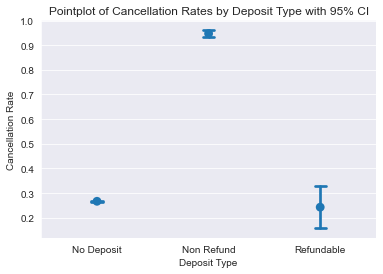

In [38]:
sns.pointplot(data=data_sub1, x='deposit_type', y='is_canceled', linestyles='', capsize=0.1)
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.title('Pointplot of Cancellation Rates by Deposit Type with 95% CI')
plt.show()

Overved from the plot that the rate of cancelled bookings where the deposit type is non-refundable is higher compared to refundable and no deposit types. This insight signifies that there is an association between deposit_type of bookings to the booking cancellation status.

To further dissect the relationship, we would add additional factors to the plot.

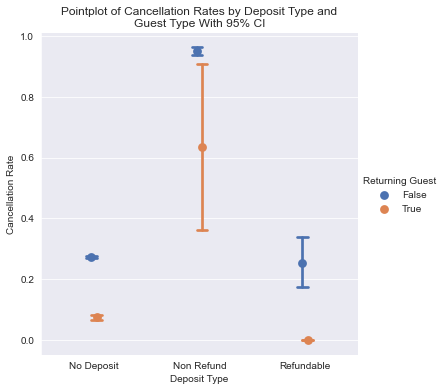

In [39]:
sns.catplot(data=data_sub1, kind='point', x='deposit_type', y='is_canceled',
            hue='Returning Guest', linestyles='',
            capsize=0.1, dodge=True, palette='deep')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.title('Pointplot of Cancellation Rates by Deposit Type and\nGuest Type With 95% CI')
plt.show()

From the given plot above, there is a significant difference in the cancellation rate between new and returning guests. New guests (customers) have higher cancellation rate compared to returning guests. The case corresponds with the previous plot where Non Refund deposit type is a significant factor change in the cancellation of bookings.

The confidence interval was computed based from bootstrapping 1000 times. This indicates that the true value of mean rate is along with the highlighted interval

#### Arrival Date

For this section, we would explore on the cancelled hotel bookings based on their arrival date.
To summarize the dataset, we would group the data by arrival month and year and provide some descriptive statistics on the `is_canceled` column.

In [40]:
hmap_data = data.groupby(['arrival_date_month','arrival_date_year'])['is_canceled'].describe().reset_index()
hmap_data.head()

,arrival_date_month,arrival_date_year,count,unique,top,freq
0,1,2016,1849,2,False,1548
1,1,2017,2844,2,False,2107
2,2,2016,2806,2,False,2278
3,2,2017,3292,2,False,2405
4,3,2016,3831,2,False,2945


Notice that the index was reset in preparation for creating a pivot table for the plot. This would be used to further understand the data and the rate of cancellation.

Before pivoting, we would mutate some columns that computes for the number of cancelled bookings each year and month, and their percentages. For this EDA, we would highlight on the percentage part of the summary data.

In [41]:
hmap_data = hmap_data.assign(n=hmap_data['count']-hmap_data['freq'])
hmap_data = hmap_data.assign(perc=hmap_data['n']/hmap_data['count'])
hmap_data.head()

,arrival_date_month,arrival_date_year,count,unique,top,freq,n,perc
0,1,2016,1849,2,False,1548,301,0.162791
1,1,2017,2844,2,False,2107,737,0.259142
2,2,2016,2806,2,False,2278,528,0.188168
3,2,2017,3292,2,False,2405,887,0.269441
4,3,2016,3831,2,False,2945,886,0.231271


In [42]:
mapping = pd.pivot_table(hmap_data, values='perc',
                         columns='arrival_date_month', index='arrival_date_year',
                         aggfunc=np.sum)
mapping

arrival_date_month,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,0.305854,0.232776,0.199366,0.162963,0.145946,0.187689
2016,0.162791,0.188168,0.231271,0.268966,0.248942,0.259028,0.283043,0.326023,0.279408,0.283892,0.243544,0.319466
2017,0.259142,0.269441,0.256382,0.337119,0.328087,0.339689,0.352162,0.367496,NaN,NaN,NaN,NaN


To visualize, we would use a heatmap to determine any small patterns on the dataset.

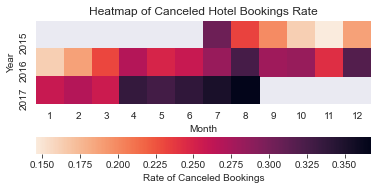

In [43]:
sns.heatmap(mapping, square=True, cmap='rocket_r',
            cbar_kws={'label':'Rate of Canceled Bookings',
                      'orientation':'horizontal'})
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Heatmap of Canceled Hotel Bookings Rate')
plt.show()

The plot above shows that there is a increase in rate of cancelled bookings on the months of June to August and the rate increases in magnitude over the years. On the other hand, there are relatively small cancellation rates on November to January compared to the other months.

#### Average Daily Rate

The Average Daily Rate `adr` is a measure to calculate the revenue earned per room. This can be calculated through:

$$ADR=\frac{Rooms Revenue Earned}{Number of Rooms Sold}$$

*Formula Taken from Investopedia Article*

Finally, we would observe on adr through time series analysis. The dates provided would be in the column `reservation_status_date`. This column indicates the result of the reservation whether it is used or not. For this TSA, we would be focusing on the dataset where the reservation status is checked-out.

In [45]:
data_tsa = data.set_index('reservation_status_date')
data_tsa = data_tsa[data_tsa['reservation_status'] == 'Check-Out']
data_tsa.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
reservation_status_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,False,342,2015,7,27,1,0,0,2,...,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out
2015-07-01,Resort Hotel,False,737,2015,7,27,1,0,0,2,...,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out
2015-07-02,Resort Hotel,False,7,2015,7,27,1,0,1,1,...,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out
2015-07-02,Resort Hotel,False,13,2015,7,27,1,0,1,1,...,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out
2015-07-03,Resort Hotel,False,14,2015,7,27,1,0,2,2,...,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out


To simplify the analysis, we would be reusing a local function to create the time series plot. The function `show_tsa` receives one required argument which is the aggregation type. For this EDA, we would explore on the daily `1D`, weekly `7D`, monthly `1M`, and quarterly `3M` aggregation of dates.

In [46]:
def show_tsa(string, **args):
    tsa_subset_data = data_tsa.resample(string).mean()['adr']
    return tsa_subset_data.plot(title='Time Series Plot of Average Daily Revenue',
                                xlabel='Dates', ylabel='ADR', **args)

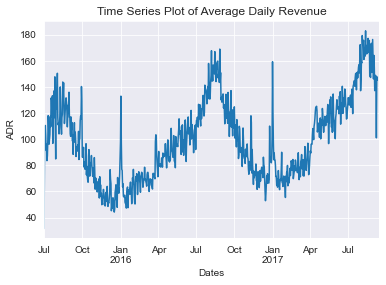

In [47]:
show_tsa('1D')
plt.show()

Already from the given plot, we would observe a noticeable pattern of average daily rate. There are some cases of spikes which could be a significant outlier. Nevertheless, we would aggregate further to better illustrate the time series.

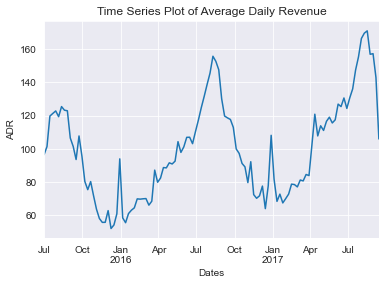

In [48]:
show_tsa('7D')
plt.show()

The plot seems better looking compared to the previous one. Although, there are spikes shown in the plot but it is now smaller compared to the previous one. This is because the aggregation used in this plot is the mean of the adr within each aggregate.

We would now be dealing with monthly data on the Average Daily Rate shown in the last 2 plots below:

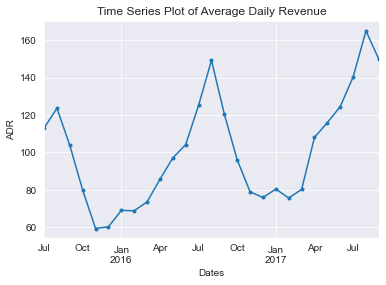

In [49]:
show_tsa('1M', marker='.')
plt.show()

We added markers on the plot to better illustrate the values each month. There is now a clear pattern where the average daily revenue spikes on the months of July and August. In addition, there is a seasonal pattern on the ADR which would be useful to predict future ADR using ARIMA modelling.

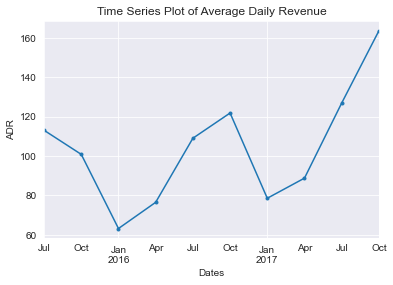

In [50]:
show_tsa('3M', marker='.')
plt.show()

This plot shows that there is an increasing pattern and trend of ADR each year. The ADR increases as it passes through 4 quarters where its peak is on the third and fourth quarter. However, this could possibly a case of overestimation in comparison to the monthly aggregates therefore would prefer the previous plot as the main plot of the time series analysis.

Possible further EDA to explore upon is the correlation of monthly adr to the monthly cancellation rates as presented in the previous section.

---

#### Miscellaneous

In [51]:
print(datetime.now())

2021-03-26 17:19:05.324934


In [52]:
!python --version

Python 3.8.8


In [53]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.19.2
1.2.3
0.11.1
